In [1]:
from core.DQNAgent import DQNAgent
import gym
import numpy as np
import torch
from tqdm import tqdm
import glob
import os
from IPython.display import Video
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from itertools import cycle
from CartPoleWrapper import CartPoleWrapper


import pyvirtualdisplay
_display = pyvirtualdisplay.Display(visible=False, size=(1400, 900))
_ = _display.start()

def plot_videos(videos_path='.', output_file_path='.'):
  stringa = 'ffmpeg -i \"concat:'
  elenco_video = glob.glob(f'{videos_path}/*.mp4')
  if len(elenco_video) == 0:
      print('0 mp4 found in this path')
      return
  elenco_file_temp = []
  for f in elenco_video:
    file = videos_path + '/temp' + str(elenco_video.index(f) + 1) + '.ts'
    os.system('ffmpeg -i ' + f + ' -c copy -bsf:v h264_mp4toannexb -f mpegts ' + file)
    elenco_file_temp.append(file)
  for f in elenco_file_temp:
    stringa += f
    if elenco_file_temp.index(f) != len(elenco_file_temp)-1:
      stringa += '|'
    else:
      stringa += f'\" -c copy  -bsf:a aac_adtstoasc {output_file_path}'
  os.system(stringa)
  display(Video(output_file_path, embed=True))

def plot_metrics():
    cycol = cycle('bgrcmk')
    f, (ax1, ax2, ax3) = plt.subplots(1, 3)

    ax1.set_xlabel('episodes')
    ax1.set_ylabel('total_rewards')
    ax1.plot(train_episode_indexes, total_rewards, c=next(cycol))

    ax2.set_xlabel('episodes')
    ax2.set_ylabel('number_steps')
    ax2.plot(train_episode_indexes, number_steps, c=next(cycol))

    ax3.set_xlabel('episodes')
    ax3.set_ylabel('cost_function_means')
    ax3.plot(train_episode_indexes, cost_function_means, c=next(cycol))

    f.tight_layout()

IndentationError: unindent does not match any outer indentation level (DQNAgent.py, line 25)

In [15]:
#agent.env = gym.wrappers.Monitor(env, 'recording/tmp-videos', force=True, video_callable=lambda episode_id: True)
for i in range(20):
    total_reward, steps, mean_cost_function = agent.start_episode_and_evaluate(DISCOUNT_FACTOR, LEARNING_RATE, 0.5, render=True, optimize=True)
    print(f'{i}\t{steps}\t{total_reward}\t{mean_cost_function}')
env.close()

plot_videos('recording/tmp-videos', 'recording/0-episodes.mp4')

0	126	126.0	0.8318330802061731
1	195	195.0	1.4256011032207239
2	9	9.0	15.147811425863283
3	14	14.0	12.317179615309593
4	16	16.0	7.342215653326364
5	71	71.0	1.721914721626061
6	50	50.0	1.7507794021002814
7	82	82.0	0.9893583480545058
8	13	13.0	11.563212088267003
9	17	17.0	6.5823492648890545
10	21	21.0	7.493228980921432
11	72	72.0	1.9057577512090371
12	20	20.0	5.656439818800854
13	47	47.0	1.5410076041740879
14	17	17.0	4.474202080924575
15	23	23.0	5.270173810682211
16	132	132.0	0.7022592516716004
17	44	44.0	2.680415978041185
18	268	268.0	0.7202537888875222
19	61	61.0	3.456539001463382


In [2]:
np.random.seed(1000)

env = CartPoleWrapper(gym.make("CartPole-v1"))
agent = DQNAgent(env)

DISCOUNT_FACTOR = 0.95
LEARNING_RATE = 0.001
total_rewards = []
number_steps = []
cost_function_means = []
train_episode_indexes = []

In [16]:
n_episodes = 0
while True:
    for i in tqdm(range(300), 'learning...'):
        agent.start_episode(DISCOUNT_FACTOR, LEARNING_RATE, 1)
    agent.save('saves/data0.nn')
    total_reward, steps, mean_cost_function = agent.start_episode_and_evaluate(DISCOUNT_FACTOR, LEARNING_RATE, 0, render=True, optimize=True)
    n_episodes += i+2
    print(f'n_episodes_training: {i}\tsteps: {steps}\ttotal_reward: {total_reward}\tmean_cost_function:{mean_cost_function}')



learning...:   4%|▍         | 13/300 [00:04<01:46,  2.69it/s]


KeyboardInterrupt: 

evaluation

train 1 000 (with %10 evaluation)

evaluation

train 9 000 - 10 000 (with %90 evaluation)

evaluation

train 90 000 - 100 000

evaluation

train 900 000 - 1 000 0000

evaluation

.0	0.8449723600037983
146	12	12.0	0.7948753328446093
147	11	11.0	0.8289352162747575
148	9	9.0	0.5664466200158773
149	16	16.0	0.8337606321129027
150	20	20.0	0.8459295642125598
151	12	12.0	0.6193454602957748
152	10	10.0	0.794275318486347
153	10	10.0	0.7099978342960849
154	14	14.0	0.8304568592864902
155	15	15.0	0.8119575383922766
156	10	10.0	0.8998132114314995
157	12	12.0	0.9682238045988764
158	15	15.0	0.7191074666182949
159	13	13.0	0.6994797218640397
160	14	14.0	0.9183689424898119
161	9	9.0	0.7678374137176728
162	17	17.0	0.8880954511941967
163	28	28.0	0.9139907757379017
164	10	10.0	0.7543964796180548
165	10	10.0	0.5843928107720286
166	16	16.0	0.8335341101702696
167	16	16.0	0.9573974542456116
168	10	10.0	0.7676697549870558
169	10	10.0	0.7696568124059613
170	18	18.0	0.8082294388438749
171	18	18.0	0.9111254614703128
172	13	13.0	0.9464958049202857
173	10	10.0	0.8820368926105004
174	27	27.0	0.9567107213891495
175	19	19.0	0.8543124116514291
176	29	29.0	0.8908805018199997
177	15	15.0	0.94043721

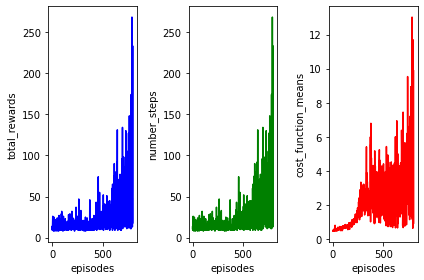

In [3]:
for i in range(800):
    total_reward, steps, mean_cost_function = agent.start_episode_and_evaluate(DISCOUNT_FACTOR, LEARNING_RATE, 0.5, render=False, optimize=True)
    print(f'{i}\t{steps}\t{total_reward}\t{mean_cost_function}')
    total_rewards.append(total_reward)
    number_steps.append(steps)
    cost_function_means.append(mean_cost_function)
    train_episode_indexes.append(i)
plot_metrics()